In [180]:
    
import sympy as sp  # Library to work with symbolic variables
from scipy import optimize
import numpy as np
from matplotlib import pyplot as plt

In [181]:
# Function to calculate symbolic denavit transformations from parameters

def symTfromDH(theta, d, a, alpha):

    Rz = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0],
                   [sp.sin(theta), sp.cos(theta), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    tz = sp.Matrix([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, d],
                   [0, 0, 0, 1]])
    ta = sp.Matrix([[1, 0, 0, a],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    Rx = sp.Matrix([[1, 0, 0, 0],
                   [0, sp.cos(alpha), -sp.sin(alpha), 0],
                   [0, sp.sin(alpha), sp.cos(alpha), 0],
                   [0, 0, 0, 1]])
    T = Rz*tz*ta*Rx
    return T

## Calculate Denavit Transformations

### First arm transformations

In [182]:
# Set Robot dimensions
L0 = 48
L1 = 150
L2 = 100
L3 = 42
L4 = 75

q01 = sp.symbols('q01') # First rotational joint angle
q02 = sp.symbols('q02') # Z axis rotational second link 
q03 = sp.symbols('q03') # X axis rotational second link 

# Calculated denavit parameters
theta0 = [0,0,q01-sp.pi/2,q02+sp.pi/2,0,-sp.pi/2]
d0 = [L4-L0,0,0,0,0,0]
a0 = [0,L3,L2,0,0,L1] 
alpha0 = [-sp.pi/2,0,0,0,q03,0]

# Partial transformations to end effector
T0_01 = symTfromDH(theta0[0],d0[0],a0[0],alpha0[0])
T0_12 = symTfromDH(theta0[1],d0[1],a0[1],alpha0[1])
T0_23 = symTfromDH(theta0[2],d0[2],a0[2],alpha0[2])

T0_34 = symTfromDH(theta0[3],d0[3],a0[3],alpha0[3])
T0_45 = symTfromDH(theta0[4],d0[4],a0[4],alpha0[4])
T0_56 = symTfromDH(theta0[5],d0[5],a0[5],alpha0[5])

T0_03 = T0_01*T0_12*T0_23
# Final tranformation
T0_06 = T0_01*T0_12*T0_23*T0_34*T0_45*T0_56
T0_06.simplify()
T0_06



Matrix([
[sin(q01 + q02)*cos(q03),  cos(q01 + q02), sin(q03)*sin(q01 + q02), 100*sin(q01) + 150*sin(q01 + q02)*cos(q03) + 42],
[              -sin(q03),               0,                cos(q03),                                   -150*sin(q03)],
[cos(q03)*cos(q01 + q02), -sin(q01 + q02), sin(q03)*cos(q01 + q02), 100*cos(q01) + 150*cos(q03)*cos(q01 + q02) + 27],
[                      0,               0,                       0,                                               1]])

## Second arm transformations

In [183]:
q11 = sp.symbols('q11') # First rotational joint angle
q12 = sp.symbols('q12') # Z axis rotational second link 
q13 = sp.symbols('q13') # X axis rotational second link 

# Calculated denavit parameters
theta1 = [0,0,0,q11-sp.pi/2,q12+sp.pi/2,0,-sp.pi/2]
d1 = [0,L4-L0,0,0,0,0,0]
a1 = [0,0,L3,L2,0,0,L1] 
alpha1 = [sp.pi*2/3,-sp.pi/2,0,0,0,q13,0]

# Partial transformations to end effector
T1_00 = symTfromDH(theta1[0],d1[0],a1[0],alpha1[0])
T1_01 = symTfromDH(theta1[1],d1[1],a1[1],alpha1[1])
T1_12 = symTfromDH(theta1[2],d1[2],a1[2],alpha1[2])
T1_23 = symTfromDH(theta1[3],d1[3],a1[3],alpha1[3])

T1_34 = symTfromDH(theta1[4],d1[4],a1[4],alpha1[4])
T1_45 = symTfromDH(theta1[5],d1[5],a1[5],alpha1[5])
T1_56 = symTfromDH(theta1[6],d1[6],a1[6],alpha1[6])

T1_03 = T1_00*T1_01*T1_12*T1_23
# Final tranformation
T1_06 = T1_00*T1_01*T1_12*T1_23*T1_34*T1_45*T1_56
T1_06.simplify()
T1_06

Matrix([
[                        sin(q11 + q12)*cos(q13),           cos(q11 + q12),                         sin(q13)*sin(q11 + q12),                                       100*sin(q11) + 150*sin(q11 + q12)*cos(q13) + 42],
[ sin(q13)/2 - sqrt(3)*cos(q13)*cos(q11 + q12)/2, sqrt(3)*sin(q11 + q12)/2, -sqrt(3)*sin(q13)*cos(q11 + q12)/2 - cos(q13)/2, 75*sin(q13) - 50*sqrt(3)*cos(q11) - 75*sqrt(3)*cos(q13)*cos(q11 + q12) - 27*sqrt(3)/2],
[-sqrt(3)*sin(q13)/2 - cos(q13)*cos(q11 + q12)/2,         sin(q11 + q12)/2, -sin(q13)*cos(q11 + q12)/2 + sqrt(3)*cos(q13)/2,                -75*sqrt(3)*sin(q13) - 50*cos(q11) - 75*cos(q13)*cos(q11 + q12) - 27/2],
[                                              0,                        0,                                               0,                                                                                     1]])

## Third arm transformations

In [184]:
q21 = sp.symbols('q21') # First rotational joint angle
q22 = sp.symbols('q22') # Z axis rotational second link 
q23 = sp.symbols('q23') # X axis rotational second link 

# Calculated denavit parameters
theta2 = [0,0,0,q21-sp.pi/2,q22+sp.pi/2,0,-sp.pi/2]
d2 = [0,L4-L0,0,0,0,0,0]
a2 = [0,0,L3,L2,0,0,L1] 
alpha2 = [-sp.pi*2/3,-sp.pi/2,0,0,0,q23,0]

# Partial transformations to end effector
T2_00 = symTfromDH(theta2[0],d2[0],a2[0],alpha2[0])
T2_01 = symTfromDH(theta2[1],d2[1],a2[1],alpha2[1])
T2_12 = symTfromDH(theta2[2],d2[2],a2[2],alpha2[2])
T2_23 = symTfromDH(theta2[3],d2[3],a2[3],alpha2[3])

T2_34 = symTfromDH(theta2[4],d2[4],a2[4],alpha2[4])
T2_45 = symTfromDH(theta2[5],d2[5],a2[5],alpha2[5])
T2_56 = symTfromDH(theta2[6],d2[6],a2[6],alpha2[6])

T2_03 = T2_00*T2_01*T2_12*T2_23
# Final tranformation
T2_06 = T2_00*T2_01*T2_12*T2_23*T2_34*T2_45*T2_56
T2_06.simplify()
T2_06

Matrix([
[                       sin(q21 + q22)*cos(q23),            cos(q21 + q22),                         sin(q23)*sin(q21 + q22),                                       100*sin(q21) + 150*sin(q21 + q22)*cos(q23) + 42],
[sin(q23)/2 + sqrt(3)*cos(q23)*cos(q21 + q22)/2, -sqrt(3)*sin(q21 + q22)/2,  sqrt(3)*sin(q23)*cos(q21 + q22)/2 - cos(q23)/2, 75*sin(q23) + 50*sqrt(3)*cos(q21) + 75*sqrt(3)*cos(q23)*cos(q21 + q22) + 27*sqrt(3)/2],
[sqrt(3)*sin(q23)/2 - cos(q23)*cos(q21 + q22)/2,          sin(q21 + q22)/2, -sin(q23)*cos(q21 + q22)/2 - sqrt(3)*cos(q23)/2,                 75*sqrt(3)*sin(q23) - 50*cos(q21) - 75*cos(q23)*cos(q21 + q22) - 27/2],
[                                             0,                         0,                                               0,                                                                                     1]])

## Direct Kinematics

In [185]:
# Calculate idle position (parallel to base) of first arm 
values ={     
q01:0,
q02:0,
q03:0,
}

T0_06.evalf(subs=values)

Matrix([
[  0, 1.0,   0,  42.0],
[  0,   0, 1.0,     0],
[1.0,   0,   0, 277.0],
[  0,   0,   0,   1.0]])

In [186]:
# Calculate idle position (parallel to base) of second arm 
values ={     
q11:0,
q12:0,
q13:0,
}

T1_06.evalf(subs=values)

Matrix([
[                 0, 1.0,                 0,              42.0],
[-0.866025403784439,   0,              -0.5, -239.889036848289],
[              -0.5,   0, 0.866025403784439,            -138.5],
[                 0,   0,                 0,               1.0]])

In [187]:
# Calculate idle position (parallel to base) of third arm 
values ={     
q21:0,
q22:0,
q23:0,
}

T2_06.evalf(subs=values)

Matrix([
[                0, 1.0,                  0,             42.0],
[0.866025403784439,   0,               -0.5, 239.889036848289],
[             -0.5,   0, -0.866025403784439,           -138.5],
[                0,   0,                  0,              1.0]])

In [188]:
# Evaluate random positions to plot the work volume
N_POINTS = 500
points0 = np.zeros([N_POINTS,3])
points1 = np.zeros([N_POINTS,3])
points2 = np.zeros([N_POINTS,3])
for i in range(N_POINTS):
    values =[np.random.uniform(0,0),np.random.uniform(0,2*sp.pi),np.random.uniform(0,2*sp.pi)] 

    points0[i,0:3] = (np.array(T0_06.evalf(subs={q01:values[0],q02:values[1],q03:values[2]})[0:3,3]).squeeze())
    points1[i,0:3] = (np.array(T1_06.evalf(subs={q11:values[0],q12:values[1],q13:values[2]})[0:3,3]).squeeze())
    points2[i,0:3] = (np.array(T2_06.evalf(subs={q21:values[0],q22:values[1],q23:values[2]})[0:3,3]).squeeze())

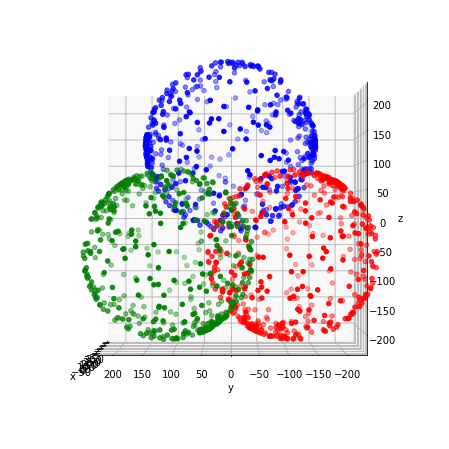

In [189]:
plt.ion()
plt.rcParams['figure.figsize'] = (16,8)
ax =plt.axes(projection='3d')
ax.set_box_aspect(aspect=(1,1,1)) 
ax.scatter3D(points0[:,0],points0[:,1],points0[:,2],c='blue')
ax.scatter3D(points1[:,0],points1[:,1],points1[:,2],c='red')
ax.scatter3D(points2[:,0],points2[:,1],points2[:,2],c='green')
ax.set_xlim(-75,375)
ax.set_ylim(-225,225)
ax.set_zlim(-225,225)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(elev=0,azim=180) # Sphere with center in Joint 1 .(radio = 150 (link 2) )

In [190]:
# Calculate intersection point of the three arms spheres volumes to get equilibrium position

degrees = [0,0,0]
x01,x11,x21 = degrees[0]*0.0174533,degrees[1]*0.0174533,degrees[2]*0.0174533

def fs(x):
    
    x02,x03,x12,x13,x22,x23=x
    f = np.zeros(6)
    f[0] = (100*np.sin(x01) + 150*np.sin(x01+x02)*np.cos(x03)+L3) - (100*np.sin(x11) + 150*np.sin(x11+x12)*np.cos(x13)+L3)
    f[1] = (100*np.sin(x01) + 150*np.sin(x01+x02)*np.cos(x03)+L3) - (100*np.sin(x21) + 150*np.sin(x21+x22)*np.cos(x23)+L3)
    f[2] = (-150*np.sin(x03)) - (75*np.sin(x13)-50*np.sqrt(3)*np.cos(x11) - 75*np.sqrt(3)*np.cos(x13)*np.cos(x11+x12) - (27*np.sqrt(3)/2))
    f[3] = (-150*np.sin(x03)) - (75*np.sin(x23)+50*np.sqrt(3)*np.cos(x21) + 75*np.sqrt(3)*np.cos(x23)*np.cos(x21+x22) + (27*np.sqrt(3)/2))
    f[4] = (100*np.cos(x01)+150*np.cos(x03)*np.cos(x01+x02)+27) - (-75*np.sqrt(3)*np.sin(x13)-50*np.cos(x11) - 75*np.cos(x13)*np.cos(x11+x12) - (27/2))
    f[5] = (100*np.cos(x01)+150*np.cos(x03)*np.cos(x01+x02)+27) - (75*np.sqrt(3)*np.sin(x23)-50*np.cos(x21) - 75*np.cos(x23)*np.cos(x21+x22) - (27/2))
    return f

In [191]:
# Get the missing link2 angles for equilibrium
f=optimize.fsolve(fs,[1,1,1,1,1,1])
print(f'Defined angles q01 : {x01}, q11: {x11}, q21 : {x21}')
print(f'q q02 {f[0]} \n q03 {f[1]} \n q12  {f[2]} \n q13 {f[3]} \n q22 {f[4]} \n q23 {f[5]} ')


Defined angles q01 : 0.0, q11: 0.0, q21 : 0.0
q q02 2.5804858376706448 
 q03 9.35827675785595e-10 
 q12  2.5804858377817226 
 q13 8.34233287704548e-11 
 q22 2.5804858378039963 
 q23 -1.0048197553763987e-09 


In [192]:
# Evaluate end effector position of arm 1
T0_06.evalf(subs={q01 :x01,q02 :f[0],q03 :f[1]})

Matrix([
[    0.532123627811339,  -0.84666666683229,  4.97976017845284e-10,     121.818544171701],
[-9.35827675785595e-10,                  0,                   1.0, -1.40374151367839e-7],
[    -0.84666666683229, -0.532123627811339, -7.92334098986799e-10, -2.48435062374357e-8],
[                    0,                  0,                     0,                  1.0]])

In [193]:
# Evaluate end effector position of arm 2
T1_06.evalf(subs={q11 :x11,q12 :f[2],q13 :f[3]})


Matrix([
[0.532123627717293, -0.846666666891397, 4.43915243415868e-11,    121.818544157594],
[0.733234842107159,  0.460832579557109,   -0.499999999938831, 3.54500985338154e-8],
[0.423333333373452,  0.266061813858646,    0.866025403819755, 6.01777953460207e-9],
[                0,                  0,                    0,                 1.0]])

In [194]:
# Evaluate end effector position of arm 2
T2_06.evalf(subs={q21 :x21,q22 :f[4],q23 :f[5]})

Matrix([
[ 0.532123627698434,  -0.84666666690325, -5.34688333413943e-10,     121.818544154765],
[-0.733234842578121, -0.460832579540777,    -0.499999999263231, -1.06094500123219e-7],
[ 0.423333332581425,  0.266061813849217,    -0.866025404209812, -1.12786198670406e-7],
[                 0,                  0,                     0,                  1.0]])

## Inverse Kinematics